# Overview of OpenPNM

OpenPNM is a framework for conducting *Pore Network Modelling* studies (i.e. **PNM**). 

The name **Open** refers to the fact that the code is 100% open-source and available on Github (https://github.com/PMEAL/OpenPNM)

It includes functionality like generating networks, computing thermodynamic properties of phases, and solving the numerical problems.  

In this workshop we'll cover each aspect of the package to provide an overview of OpenPNM's capabilities and how to access them.

## OpenPNM is Oganized in Several Modules

The main modules are described below:

- ``network``: Contains the ``Network`` class and numerous generators. The network objects are dictionaries that contain the topological and geometric properties of the network.
- ``phase``: Contains the ``Phase`` class, as well as several other classes for mixtures. The phase objects are also dictionaries that contain the thermodynamic and transport properties of the fluid. 
- ``algorithms``: Contains all the classes used for performing simulations, including flow, diffusion, dispersion, percolation, drainage, etc.
- ``models``: A library containing 'pore-scale' models which are used to compute the properties of each pore and throat.

It also contains several helper modules such as:
- ``io``: Functions for reading and writing data between formats
- ``visualization``: Small set of functions for basic visualization
- ``topotools``: Functions for editing and querying the network topology
- ``solvers`` and ``integrators``: Classes for steady-state and transient solving of the equations
- ``core``: Mostly used internally
- ``utils``: Mostly used internally

## OpenPNM is Object-Oriented

- An OpenPNM simulation is quite a bit more complicated than some image analysis with PoreSpy for instance. 
- There is a lot more data to deal with and a lot more things that can be done with the data. 
- Because of this added complexity, it is necessary (and helpful!) to use ``objects``.
- The main object used in OpenPNM is the Python ``dict``

### Refresher on the ``dict``

The ``dict`` is a highly versatile data container that allows access to the data by name:

In [11]:
d = dict()
d['bob'] = 1.0
d['fred'] = [1, 2, 3]
print(d)

{'bob': 1.0, 'fred': [1, 2, 3]}


In OpenPNM, the data being stored are the pore and throat properties, like diameter and volume:

In [12]:
net = dict()
net['pore.diameter'] = [2, 1.5, 1]
net['throat.length'] = [0.75, 1.5]
print(net)

{'pore.diameter': [2, 1.5, 1], 'throat.length': [0.75, 1.5]}


We'll explore this data storage scheme in more depth later. 

> The key to note here is that there are 3 pores and 2 throats.  

One *massive* benefit of using a ``dict`` is that we can *subclass* it.  This allows us to add our own custom functionality to the ``dict``. 

This is done as follows:

In [13]:
class Network(dict):
    
    def num_pores(self):
        return len(self['pore.diameter'])
    
    def num_throats(self):
        return len(self['throat.length'])

And we can use it like this:

In [14]:
net = Network()
net['pore.diameter'] = [2, 1.5, 1]
net['throat.length'] = [0.75, 1.5]
print(f'The network has {net.num_pores()} pores')
print(f'The network has {net.num_throats()} throats')

The network has 3 pores
The network has 2 throats


Hopefully the class definition above gives you as sense of the power of object-oriented programming. 

The main point is:

> The ``net`` object behaves as a generic ``dict`` PLUS we have added some functions that are *very specific* to our use case. These functions are designed to work on the data within the ``dict``.

And the motivation for tell you this:

> OpenPNM uses this technique quite extensively

## A First Look at Using OpenPNM

Let's look quickly at using OpenPNM:

In [15]:
import openpnm as op

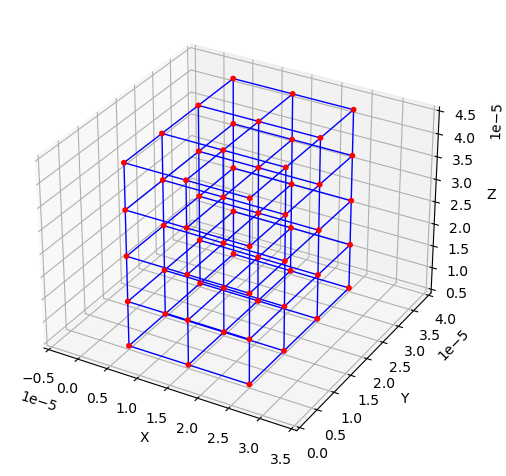

In [16]:
pn = op.network.Cubic([3, 4, 5], spacing=1e-5)
ax = op.visualization.plot_connections(pn)
ax = op.visualization.plot_coordinates(pn, ax=ax);

In [17]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ab78dfcd10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       60 / 60
  3  throat.conns                                                    133 / 133
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.surface                                                           54
  3  throat.surface                                                        104
  4  pore.left                                                              20
  5 

### Adding Geometrical Properties

Note that this network does not yet have any geometrical properties.  We have to add these explicitly, which is how we declare our preference for pore shape, size distribution, and so forth:

In [18]:
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ab78dfcd10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       60 / 60
  3  throat.conns                                                    133 / 133
  4  pore.coordination_number                                          60 / 60
  5  pore.max_size                                                     60 / 60
  6  throat.spacing                                                  133 / 133
  7  pore.seed                                                         60 / 60
  8  pore.diameter                                                     60 / 60
  9  throat.max_size                                                 133 / 133
 10 

### Calculating Thermodynamic Properties

And let's create an ``Air`` object then do a diffusion simulation:

In [19]:
air = op.phase.Air(network=pn)
print(air)


══════════════════════════════════════════════════════════════════════════════
phase_01 : <openpnm.phase.Air at 0x1ab79683220>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                                  60 / 60
  3  pore.pressure                                                     60 / 60
  4  pore.density                                                      60 / 60
  5  pore.molar_density                                                60 / 60
  6  pore.diffusivity                                                  60 / 60
  7  pore.thermal_conductivity                                         60 / 60
  8  pore.viscosity                                                    60 / 60
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #

### Computing Transport Properites

The diffusive conductance of a conduit, the pore-throat-pore connection, is a function of the geometric sizes and thermodynamic properties:

$$ N = D_{AB} \frac{A}{L} \Delta C = g_D \Delta C$$

In [20]:
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
print(air)

[15:07:51] WARNING  throat.entry_pressure was not run since the following property is missing:       ]8;id=484112;file://C:\Users\jeff\anaconda3\envs\porespy2\lib\site-packages\openpnm\core\_models.py\_models.py]8;;\:]8;id=190766;file://C:\Users\jeff\anaconda3\envs\porespy2\lib\site-packages\openpnm\core\_models.py#480\480]8;;\
                    'throat.surface_tension'                                                                       


══════════════════════════════════════════════════════════════════════════════
phase_01 : <openpnm.phase.Air at 0x1ab79683220>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                                  60 / 60
  3  pore.pressure                                                     60 / 60
  4  pore.density                                                      60 / 60
  5  pore.molar_density                                                60 / 60
  6  pore.diffusivity                                                  60 / 60
  7  pore.thermal_conductivity                                         60 / 60
  8  pore.viscosity                                                    60 / 60
  9  throat.hydraulic_conductance                                    133 / 133
 10

With the pore sizes, phase properties, and transport models defined, we can do the simulation:

In [21]:
fd = op.algorithms.FickianDiffusion(network=pn, phase=air)
fd.set_value_BC(pores=pn['pore.top'], values=1.0)
fd.set_value_BC(pores=pn['pore.bottom'], values=0.0)
fd.run()

The algorithm writes the results of the simulation into it's own dictionary:

In [22]:
print(fd)


══════════════════════════════════════════════════════════════════════════════
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x1ab0176dd10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                       0 / 60
  3  pore.bc.value                                                     24 / 60
  4  pore.concentration                                                60 / 60
  5  pore.initial_guess                                                60 / 60
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                    

We can re-visualize the network, but chose to color the nodes according to their concentration, and the throats according to the mass flow rate through each:

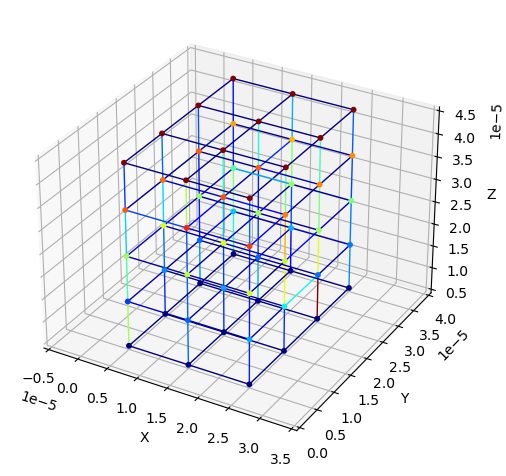

In [23]:
ax = op.visualization.plot_connections(pn, color_by=fd.rate(throats=pn.Ts, mode='single'))
ax = op.visualization.plot_coordinates(pn, color_by=fd.x, ax=ax)